In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [3]:
train_labels = []
train_samples = []

In [23]:
test_labels = []
test_samples = []

## Create their own datas

### Training sets

In [5]:
for i in range(50):
    # The 5% of younger individual who did experience side effect of vaccine
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individual who did not experience side effect of vaccine
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individual who did not experience side effect of vaccine
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individual who did experience side effect of vaccine
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

### Test sets

In [24]:
for i in range(10):
    # The 5% of younger individual who did experience side effect of vaccine
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individual who did not experience side effect of vaccine
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individual who did not experience side effect of vaccice
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individual who did experience side effect of vaccine
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [8]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

train_labels, train_samples = shuffle(train_labels, train_samples)

In [25]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

test_labels, test_samples = shuffle(test_labels, test_samples)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [26]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [11]:
for i in scaled_train_samples:
    print(i)

[0.83908046]
[0.05747126]
[0.22988506]
[0.93103448]
[0.63218391]
[0.47126437]
[0.8045977]
[0.59770115]
[0.14942529]
[0.83908046]
[0.62068966]
[0.05747126]
[0.95402299]
[0.96551724]
[0.43678161]
[0.28735632]
[0.50574713]
[0.82758621]
[0.08045977]
[0.66666667]
[0.12643678]
[0.94252874]
[0.63218391]
[0.02298851]
[0.88505747]
[0.]
[0.18390805]
[0.40229885]
[0.77011494]
[0.27586207]
[0.22988506]
[0.66666667]
[0.44827586]
[0.2183908]
[0.67816092]
[0.88505747]
[0.43678161]
[0.63218391]
[0.55172414]
[0.49425287]
[0.71264368]
[0.02298851]
[0.85057471]
[0.2183908]
[0.32183908]
[0.40229885]
[0.67816092]
[0.35632184]
[0.73563218]
[0.97701149]
[0.28735632]
[0.03448276]
[0.37931034]
[0.08045977]
[0.82758621]
[0.40229885]
[0.56321839]
[0.42528736]
[0.42528736]
[0.59770115]
[0.12643678]
[0.74712644]
[0.90804598]
[0.02298851]
[0.6091954]
[0.67816092]
[0.08045977]
[0.40229885]
[0.90804598]
[0.42528736]
[0.33333333]
[0.51724138]
[0.73563218]
[0.20689655]
[0.66666667]
[0.32183908]
[0.22988506]
[0.45977011

[0.56321839]
[0.06896552]
[0.72413793]
[0.65517241]
[0.14942529]
[0.94252874]
[0.18390805]
[0.35632184]
[0.08045977]
[0.88505747]
[0.6091954]
[0.55172414]
[0.56321839]
[0.44827586]
[0.72413793]
[0.97701149]
[0.79310345]
[0.88505747]
[0.27586207]
[0.14942529]
[0.8045977]
[0.2183908]
[0.75862069]
[0.72413793]
[0.74712644]
[0.93103448]
[0.57471264]
[0.98850575]
[0.66666667]
[0.74712644]
[0.14942529]
[0.32183908]
[0.81609195]
[0.2183908]
[0.83908046]
[0.97701149]
[0.81609195]
[0.66666667]
[0.82758621]
[0.24137931]
[0.86206897]
[0.8045977]
[0.93103448]
[0.08045977]
[0.7816092]
[0.89655172]
[0.86206897]
[0.5862069]
[0.56321839]
[0.32183908]
[0.82758621]
[0.65517241]
[0.11494253]
[0.37931034]
[0.8045977]
[0.09195402]
[0.91954023]
[0.51724138]
[0.85057471]
[0.20689655]
[0.4137931]
[0.16091954]
[0.37931034]
[0.95402299]
[0.86206897]
[0.44827586]
[0.25287356]
[0.63218391]
[0.95402299]
[0.45977011]
[0.2183908]
[0.12643678]
[0.16091954]
[0.29885057]
[0.13793103]
[0.05747126]
[0.40229885]
[0.034482

[0.59770115]
[0.7816092]
[0.65517241]
[0.5862069]
[0.62068966]
[0.85057471]
[0.26436782]
[0.63218391]
[0.10344828]
[0.93103448]
[0.65517241]
[0.40229885]
[0.7816092]
[0.27586207]
[0.81609195]
[0.89655172]
[0.10344828]
[0.79310345]
[0.3908046]
[0.36781609]
[0.75862069]
[0.74712644]
[0.3908046]
[0.42528736]
[0.66666667]
[0.18390805]
[0.37931034]
[0.42528736]
[0.43678161]
[0.40229885]
[0.79310345]
[0.10344828]
[0.06896552]
[0.98850575]
[0.64367816]
[0.91954023]
[0.86206897]
[0.62068966]
[0.06896552]
[0.35632184]
[0.7816092]
[0.70114943]
[0.91954023]
[0.2183908]
[0.62068966]
[0.05747126]
[0.36781609]
[0.16091954]
[0.51724138]
[0.26436782]
[0.11494253]
[0.26436782]
[0.97701149]
[0.66666667]
[0.73563218]
[0.52873563]
[0.36781609]
[0.68965517]
[0.82758621]
[0.01149425]
[0.32183908]
[0.33333333]
[0.10344828]
[0.72413793]
[0.12643678]
[0.55172414]
[0.08045977]
[0.13793103]
[0.72413793]
[0.71264368]
[0.14942529]
[0.16091954]
[0.72413793]
[0.8045977]
[0.93103448]
[0.48275862]
[0.68965517]
[0.1379

## tf.keras Sequential Model

Peut etre définis comme un pile linéaire de couches

In [14]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [22]:
model.fit(
    x=scaled_train_samples, 
    y=train_labels,
    validation_split=0.1, 
    batch_size=10, 
    epochs=30, 
    shuffle=True, verbose=2
)

Epoch 1/30
189/189 - 0s - loss: 0.2622 - accuracy: 0.9349 - val_loss: 0.2767 - val_accuracy: 0.9429
Epoch 2/30
189/189 - 0s - loss: 0.2610 - accuracy: 0.9370 - val_loss: 0.2761 - val_accuracy: 0.9429
Epoch 3/30
189/189 - 0s - loss: 0.2600 - accuracy: 0.9413 - val_loss: 0.2754 - val_accuracy: 0.9429
Epoch 4/30
189/189 - 0s - loss: 0.2588 - accuracy: 0.9423 - val_loss: 0.2736 - val_accuracy: 0.9429
Epoch 5/30
189/189 - 0s - loss: 0.2582 - accuracy: 0.9381 - val_loss: 0.2735 - val_accuracy: 0.9429
Epoch 6/30
189/189 - 0s - loss: 0.2571 - accuracy: 0.9386 - val_loss: 0.2730 - val_accuracy: 0.9429
Epoch 7/30
189/189 - 0s - loss: 0.2562 - accuracy: 0.9429 - val_loss: 0.2734 - val_accuracy: 0.9429
Epoch 8/30
189/189 - 0s - loss: 0.2554 - accuracy: 0.9429 - val_loss: 0.2722 - val_accuracy: 0.9429
Epoch 9/30
189/189 - 0s - loss: 0.2546 - accuracy: 0.9429 - val_loss: 0.2716 - val_accuracy: 0.9429
Epoch 10/30
189/189 - 0s - loss: 0.2539 - accuracy: 0.9429 - val_loss: 0.2709 - val_accuracy: 0.9429

In [21]:
#history = model.history

In [27]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [29]:
for i in predictions:
    print(i)

[0.9703461  0.02965387]
[0.03268774 0.9673122 ]
[0.06255158 0.9374484 ]
[0.04699636 0.95300364]
[0.9711811  0.02881892]
[0.04067026 0.95932966]
[0.7796768  0.22032318]
[0.63351935 0.3664807 ]
[0.9697421  0.03025789]
[0.05826266 0.9417373 ]
[0.06845582 0.93154424]
[0.97171044 0.02828961]
[0.04372426 0.95627576]
[0.16770567 0.83229434]
[0.19421282 0.8057872 ]
[0.3303891 0.6696109]
[0.85828453 0.14171545]
[0.01682581 0.98317415]
[0.06255158 0.9374484 ]
[0.9701461 0.0298539]
[0.02622915 0.9737708 ]
[0.9702463  0.02975372]
[0.8089025  0.19109748]
[0.01449913 0.9855009 ]
[0.97044563 0.02955434]
[0.9524449  0.04755512]
[0.04699636 0.95300364]
[0.9707422 0.0292577]
[0.9710361  0.02896395]
[0.9701461 0.0298539]
[0.10533487 0.89466506]
[0.01812312 0.98187685]
[0.940102   0.05989807]
[0.5471407  0.45285928]
[0.02101894 0.9789811 ]
[0.97161496 0.028385  ]
[0.02101894 0.9789811 ]
[0.97113335 0.02886668]
[0.89634424 0.1036558 ]
[0.9611923  0.03880769]
[0.03268774 0.9673122 ]
[0.9611923  0.03880769]


In [30]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [31]:
for i in rounded_predictions:
    print(i)

0
1
1
1
0
1
0
0
0
1
1
0
1
1
1
1
0
1
1
0
1
0
0
1
0
0
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
0
1
0
0
1
0
1
0
0
0
0
0
1
0
1
1
1
1
1
0
0
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
0
0
1
1
1
0
1
1
0
0
0
1
1
0
1
0
1
1
0
1
1
1
0
0
1
1
0
0
0
0
0
0
1
1
1
0
1
1
0
0
0
1
1
0
0
1
0
1
1
1
0
1
0
1
1
0
0
1
0
1
1
0
1
1
1
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
1
0
1
1
1
1
0
0
1
1
1
0
0
0
1
0
0
1
1
0
1
1
0
0
1
0
0
0
1
1
1
0
0
1
0
1
1
1
0
0
1
0
0
0
0
0
1
0
0
1
0
1
1
1
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
0
0
0
1
0
0
0
0
1
1
1
0
0
0
1
1
1
0
0
0
0
1
0
1
1
0
0
1
1
0
1
1
1
0
0
1
1
0
1
1
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
0
0
0
1
1
0
0
1
0
0
0
0
1
0
1
0
1
1
1
1
0
0
0
0
1
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
1
0
0
1
1
0
0
0
1
0
1
1
1
0
1


## Confusion matrix

In [32]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [33]:
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [45]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.neawis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(
            j, i, cm[i, j], 
            horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted')

In [40]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']

Confusion matrix, without normalization
[[200  10]
 [ 10 200]]


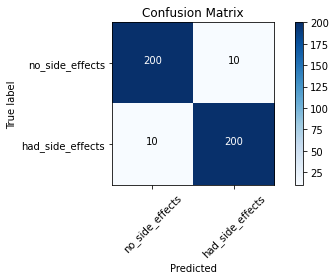

In [46]:
plot_confusion_matrix(cm=cm,classes=cm_plot_labels, title="Confusion Matrix")